In [4]:
import numpy as np 
w_i_h = weights_input_hidden = np.random.uniform(-0.5,0.5,(32,784))# the whole thing is 5 by 4 by 3 but we go by right to left (better computing) 
w_h_o = weights_hidden_output = np.random.uniform(-0.5,0.5,(10,32))
print(w_i_h)
print(w_h_o)

[[-0.35964148  0.46385075 -0.28532439 ... -0.25515357 -0.32495042
  -0.27155218]
 [ 0.04206802  0.03622453  0.01396934 ...  0.32782621  0.36180195
  -0.14325595]
 [ 0.46863822 -0.11059962  0.42165262 ...  0.39116523 -0.35127551
   0.25547328]
 ...
 [-0.12237744  0.33433127 -0.26465996 ...  0.41529634  0.04349996
  -0.33156686]
 [ 0.06439124 -0.23334231 -0.06026734 ...  0.43085374  0.41772945
   0.4341447 ]
 [-0.16289972  0.25062625  0.11668824 ... -0.47026772 -0.27955552
  -0.16577595]]
[[ 0.30503383  0.45441366  0.2018764   0.11442843  0.06324206 -0.36374903
   0.23462306 -0.06451812  0.14886532  0.12894452  0.18568197  0.48166912
   0.40175625 -0.18719938  0.07993734  0.28024697  0.15467772  0.40958295
  -0.43585211 -0.0986697  -0.45912952 -0.0459625  -0.31326127  0.24947274
  -0.45337426  0.25836762 -0.27245862  0.38904918  0.08154898  0.27505923
  -0.0675003  -0.14415614]
 [-0.08161375 -0.20300119  0.02430861 -0.21235987  0.12145702  0.29133003
   0.13313067 -0.09056644 -0.27609891

In [5]:
#bias neuron added to the hidden layer(s) and the output layer 
b_i_h = bias_input_hidden = np.zeros((32,1))
b_h_o = bias_hidden_output = np.zeros((10,1))
print(b_i_h)
print(b_h_o)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [1]:
def initialize_network(input_size=784, hidden_size=32, output_size=10):
    # Initialize weights with random values between -0.5 and 0.5
    w_i_h = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    w_h_o = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    
    # Initialize biases with zeros
    b_i_h = np.zeros((hidden_size, 1))
    b_h_o = np.zeros((output_size, 1))
    
    return w_i_h, w_h_o, b_i_h, b_h_o

In [1]:
import os
from PIL import Image
import numpy as np

def load_mnist_data(base_path):
    # Define the subfolders
    subfolders = ['training', 'testing']
    
    # Initialize dictionaries to store images and labels
    data = {subfolder: {'images': [], 'labels': []} for subfolder in subfolders}
    
    # Loop through training and testing folders
    for subfolder in subfolders:
        folder_path = os.path.join(base_path, subfolder)
        
        # Loop through each digit folder (0-9)
        for digit in range(10):
            digit_folder = os.path.join(folder_path, str(digit))
            
            # Loop through each image in the digit folder
            for image_file in os.listdir(digit_folder):
                image_path = os.path.join(digit_folder, image_file)
                
                # Open the image and convert to grayscale
                with Image.open(image_path).convert('L') as img:
                    # Convert image to numpy array and normalize
                    img_array = np.array(img) / 255.0
                    
                    # Add image and label to the respective lists
                    data[subfolder]['images'].append(img_array)
                    data[subfolder]['labels'].append(digit)
    
    # Convert lists to numpy arrays
    for subfolder in subfolders:
        data[subfolder]['images'] = np.array(data[subfolder]['images'])
        data[subfolder]['labels'] = np.array(data[subfolder]['labels'])
    
    return data

def preprocess_data(data):
    # Reshape images
    data['images'] = data['images'].reshape(data['images'].shape[0], -1)
    
    # One-hot encode labels
    num_classes = 10
    data['labels'] = np.eye(num_classes)[data['labels']]
    
    return data

# Usage
base_path = 'mnist_png'  # Update this to your actual path
mnist_data = load_mnist_data(base_path)

# Preprocess training and testing data
train_data = preprocess_data(mnist_data['training'])
test_data = preprocess_data(mnist_data['testing'])

# Access the data
X_train = train_data['images']
y_train = train_data['labels']
X_test = test_data['images']
y_test = test_data['labels']

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training images shape: (60000, 784)
Training labels shape: (60000, 10)
Testing images shape: (10000, 784)
Testing labels shape: (10000, 10)


Epoch 1/60, Train Loss: 0.7609, Train Accuracy: 50.99%, Test Loss: 0.5866, Test Accuracy: 69.06%
Epoch 2/60, Train Loss: 0.5023, Train Accuracy: 74.06%, Test Loss: 0.4277, Test Accuracy: 79.01%
Epoch 3/60, Train Loss: 0.3895, Train Accuracy: 80.34%, Test Loss: 0.3440, Test Accuracy: 82.80%
Epoch 4/60, Train Loss: 0.3254, Train Accuracy: 83.34%, Test Loss: 0.2928, Test Accuracy: 85.36%
Epoch 5/60, Train Loss: 0.2845, Train Accuracy: 85.12%, Test Loss: 0.2597, Test Accuracy: 86.68%
Epoch 6/60, Train Loss: 0.2565, Train Accuracy: 86.36%, Test Loss: 0.2360, Test Accuracy: 87.69%
Epoch 7/60, Train Loss: 0.2360, Train Accuracy: 87.18%, Test Loss: 0.2180, Test Accuracy: 88.55%
Epoch 8/60, Train Loss: 0.2205, Train Accuracy: 87.88%, Test Loss: 0.2048, Test Accuracy: 89.05%
Epoch 9/60, Train Loss: 0.2083, Train Accuracy: 88.31%, Test Loss: 0.1937, Test Accuracy: 89.48%
Epoch 10/60, Train Loss: 0.1984, Train Accuracy: 88.75%, Test Loss: 0.1851, Test Accuracy: 89.85%
Epoch 11/60, Train Loss: 0.19

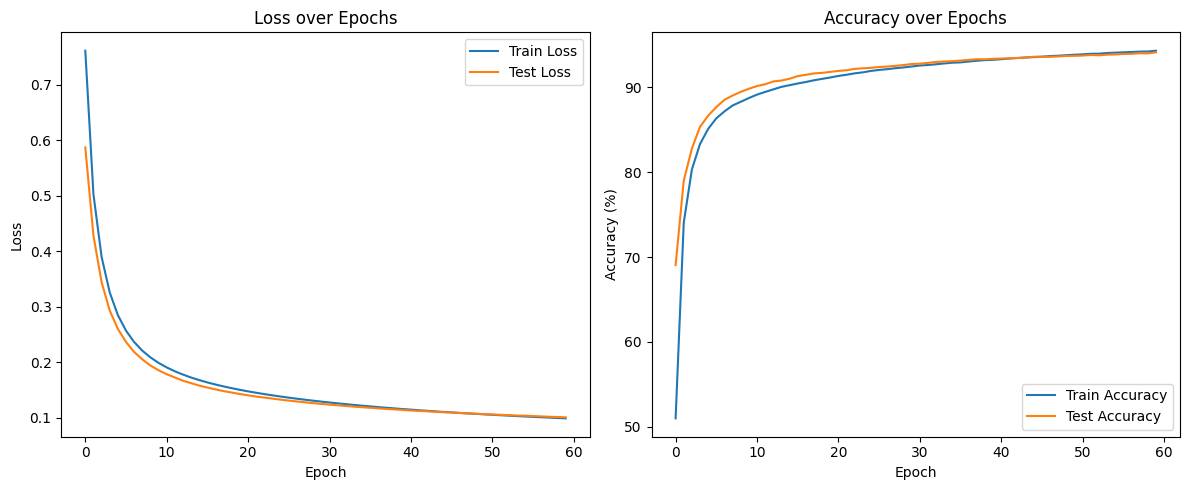

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_network(input_size=784, hidden_size=32, output_size=10):
    w_i_h = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    w_h_o = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    b_i_h = np.zeros((hidden_size, 1))
    b_h_o = np.zeros((output_size, 1))
    return w_i_h, w_h_o, b_i_h, b_h_o

def forward_pass(X, w_i_h, w_h_o, b_i_h, b_h_o):
    h = 1 / (1 + np.exp(-(np.dot(w_i_h, X) + b_i_h)))
    o = 1 / (1 + np.exp(-(np.dot(w_h_o, h) + b_h_o)))
    return h, o

def evaluate(X, y, w_i_h, w_h_o, b_i_h, b_h_o):
    _, o = forward_pass(X.T, w_i_h, w_h_o, b_i_h, b_h_o)
    loss = np.mean(np.sum((o - y.T)**2, axis=0))
    accuracy = np.mean(np.argmax(o, axis=0) == np.argmax(y, axis=1)) * 100
    return loss, accuracy

def batch_train(X_train, y_train, X_test, y_test, epochs=40, batch_size=32, learning_rate=0.01):
    w_i_h, w_h_o, b_i_h, b_h_o = initialize_network()
    n_samples, n_features = X_train.shape
    n_batches = n_samples // batch_size

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    for epoch in range(epochs):
        epoch_loss = 0
        nr_correct = 0

        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_train, y_train = X_train[indices], y_train[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size

            # Get the batch
            X_batch = X_train[start:end].T
            y_batch = y_train[start:end].T

            # Forward pass
            h, o = forward_pass(X_batch, w_i_h, w_h_o, b_i_h, b_h_o)

            # Compute batch loss and accuracy
            batch_loss = np.mean(np.sum((o - y_batch)**2, axis=0))
            epoch_loss += batch_loss
            nr_correct += np.sum(np.argmax(o, axis=0) == np.argmax(y_batch, axis=0))

            # Backward propagation
            delta_o = o - y_batch
            delta_h = np.dot(w_h_o.T, delta_o) * (h * (1 - h))

            # Update weights and biases
            w_h_o -= learning_rate * np.dot(delta_o, h.T) / batch_size
            b_h_o -= learning_rate * np.mean(delta_o, axis=1, keepdims=True)
            w_i_h -= learning_rate * np.dot(delta_h, X_batch.T) / batch_size
            b_i_h -= learning_rate * np.mean(delta_h, axis=1, keepdims=True)

        # Compute epoch metrics
        train_loss = epoch_loss / n_batches
        train_accuracy = (nr_correct / n_samples) * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate on test set
        test_loss, test_accuracy = evaluate(X_test, y_test, w_i_h, w_h_o, b_i_h, b_h_o)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot training progress
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return w_i_h, w_h_o, b_i_h, b_h_o
w_i_h, w_h_o, b_i_h, b_h_o = batch_train(X_train, y_train ,X_test, y_test,epochs=60, batch_size=32, learning_rate=0.01)


In [3]:
from sklearn.datasets import fetch_openml

# Fetch the entire dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# The last 10,000 samples are the test set
X_test = X[-10000:]
y_test = y[-10000:]

/home/rail_hail/.conda/envs/Font/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
# Load and preprocess a single image
def load_and_preprocess_image(file_path):
    with Image.open(file_path).convert('L') as img:
        img = img.resize((28, 28))
        img_array = np.array(img)
        if img_array.mean() > 128:
            img_array = 255 - img_array
        img_array = img_array / 255.0
        img_array = img_array.reshape(784, 1)
    return img_array
# Function to display the image
def display_image(img_array):
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()
    # Function to predict using your neural network
def predict(img, w_i_h, b_i_h, w_h_o, b_h_o):
    h_pre = b_i_h + np.dot(w_i_h, img)
    h = 1 / (1 + np.exp(-h_pre))
    o_pre = b_h_o + np.dot(w_h_o, h)
    o = 1 / (1 + np.exp(-o_pre))
    return o

Displaying the image:


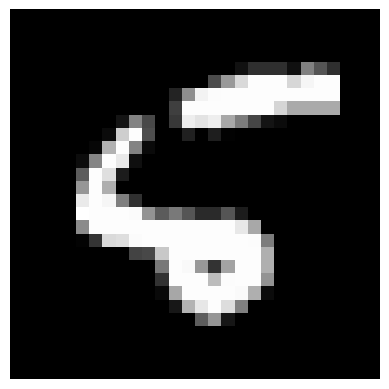

In [9]:
# Main process
folder_path = 'test'  # Change this to your image directory
file_name = '0006.png'  # Change this to your image file name
# Load and display the image
file_path = os.path.join(folder_path, file_name)
img = load_and_preprocess_image(file_path)

print("Displaying the image:")
display_image(img)

In [10]:

# Pass the image through the neural network
output = predict(img, w_i_h, b_i_h, w_h_o, b_h_o)

# Display the results
print("\nNeural Network Output:")
for i, prob in enumerate(output):
    print(f"Digit {i}: {prob[0]:.4f}")

print(f"\nPredicted digit: {np.argmax(output)}")


Neural Network Output:
Digit 0: 0.0062
Digit 1: 0.0001
Digit 2: 0.2786
Digit 3: 0.0000
Digit 4: 0.0308
Digit 5: 0.2558
Digit 6: 0.7012
Digit 7: 0.0000
Digit 8: 0.0023
Digit 9: 0.0009

Predicted digit: 6
